According to Data Dictionary on National Codes for ethnicity the groups signify the following;
* Group A - White - British
* Group B - White - Irish
* Group C - White - Any other White background
* Group D - Mixed - White and Black Caribbean
* Group E - Mixed - White and Black African
* Group F - Mixed - White and Asian
* Group G - Mixed - Any other mixed background

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings('ignore')

In [2]:
# Loading file
df = pd.read_csv('StudentsPerformance.csv')

# Checking the dataset and its structure


First, let's take an overview of the data.

In [3]:
# Visualizing top 5 rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Checking missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# Checking duplicated rows
print(f"There are {df.duplicated().sum()} duplicated rows")

There are 0 duplicated rows


In [7]:
# Brief statistical info
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Interesting, the median is very close to the mean. I assume that we are dealing with a small amount of outliers or none at all.

### About the dataset:

1. 1000 rows and 8 columns.
2. No missing values or duplicated rows.
3. 2 dtpes: object and int64.
4. We should replace the spaces between words in each column name with an underscore, it's a good practice to follow.

In [8]:
# Replacing the space with the underscore
df = df.rename(columns=lambda x: x.replace(' ', '_'))
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [9]:
# Checking the categorical values in each column
col_categ = list(df.select_dtypes("object").columns)

for categ in col_categ:
    print(df[categ].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


# Data analysis



## Univariate analysis

### Distribution of categorical variables

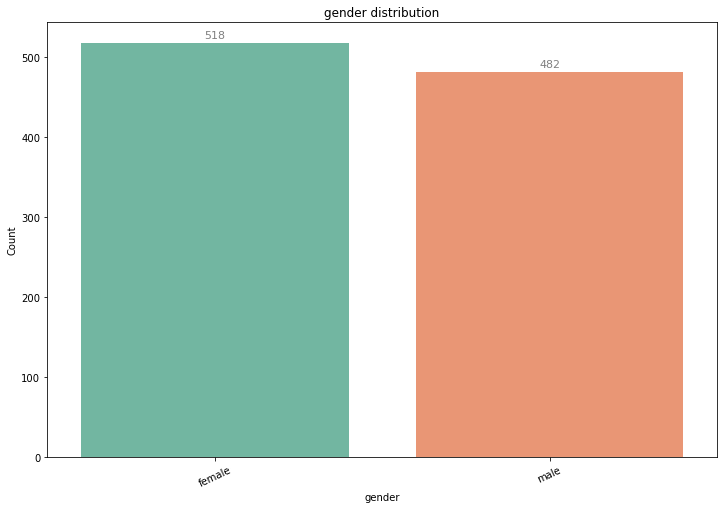

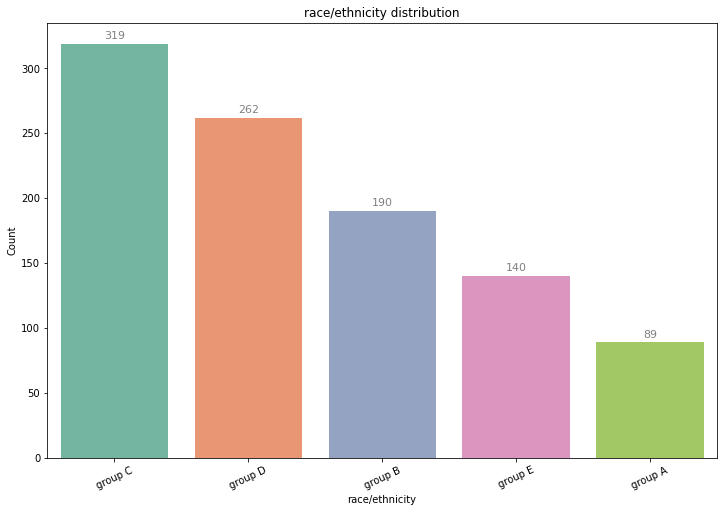

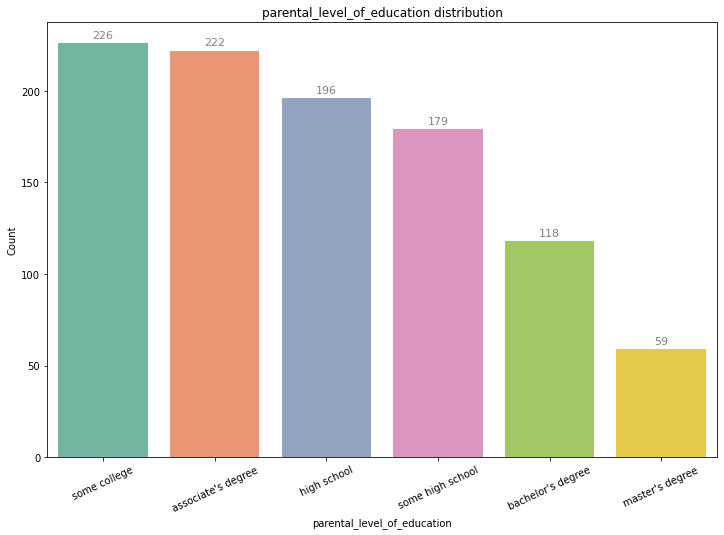

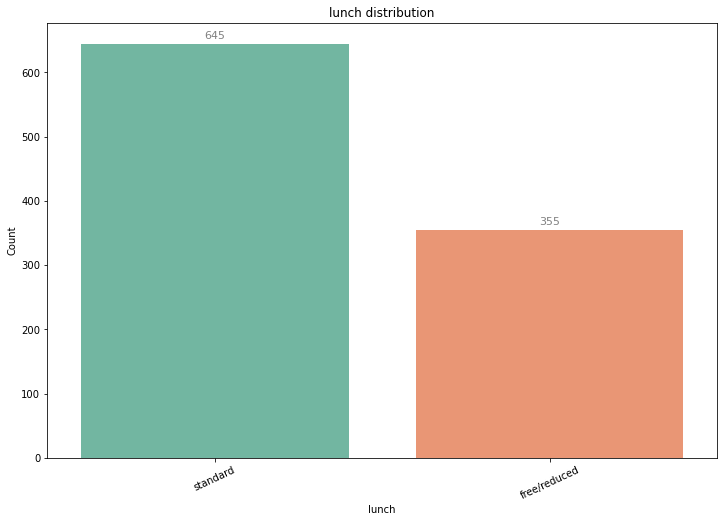

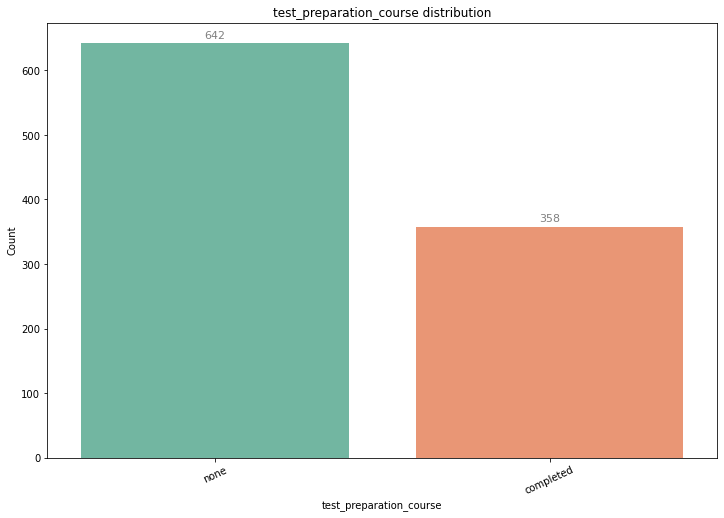

In [10]:
for categ in col_categ:
    categ_counts = df[categ].value_counts().sort_values(ascending=False).index
    
    plt.figure(figsize=(12,8))
    ax = sns.countplot(data=df, x=categ, palette="Set2", order=categ_counts)
    plt.xticks(rotation=25)
    ax.set_ylabel("Count")
    ax.set_title(f"{categ} distribution")
    
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                    textcoords='offset points')
    
    plt.show()



### Distribution of numerical variables



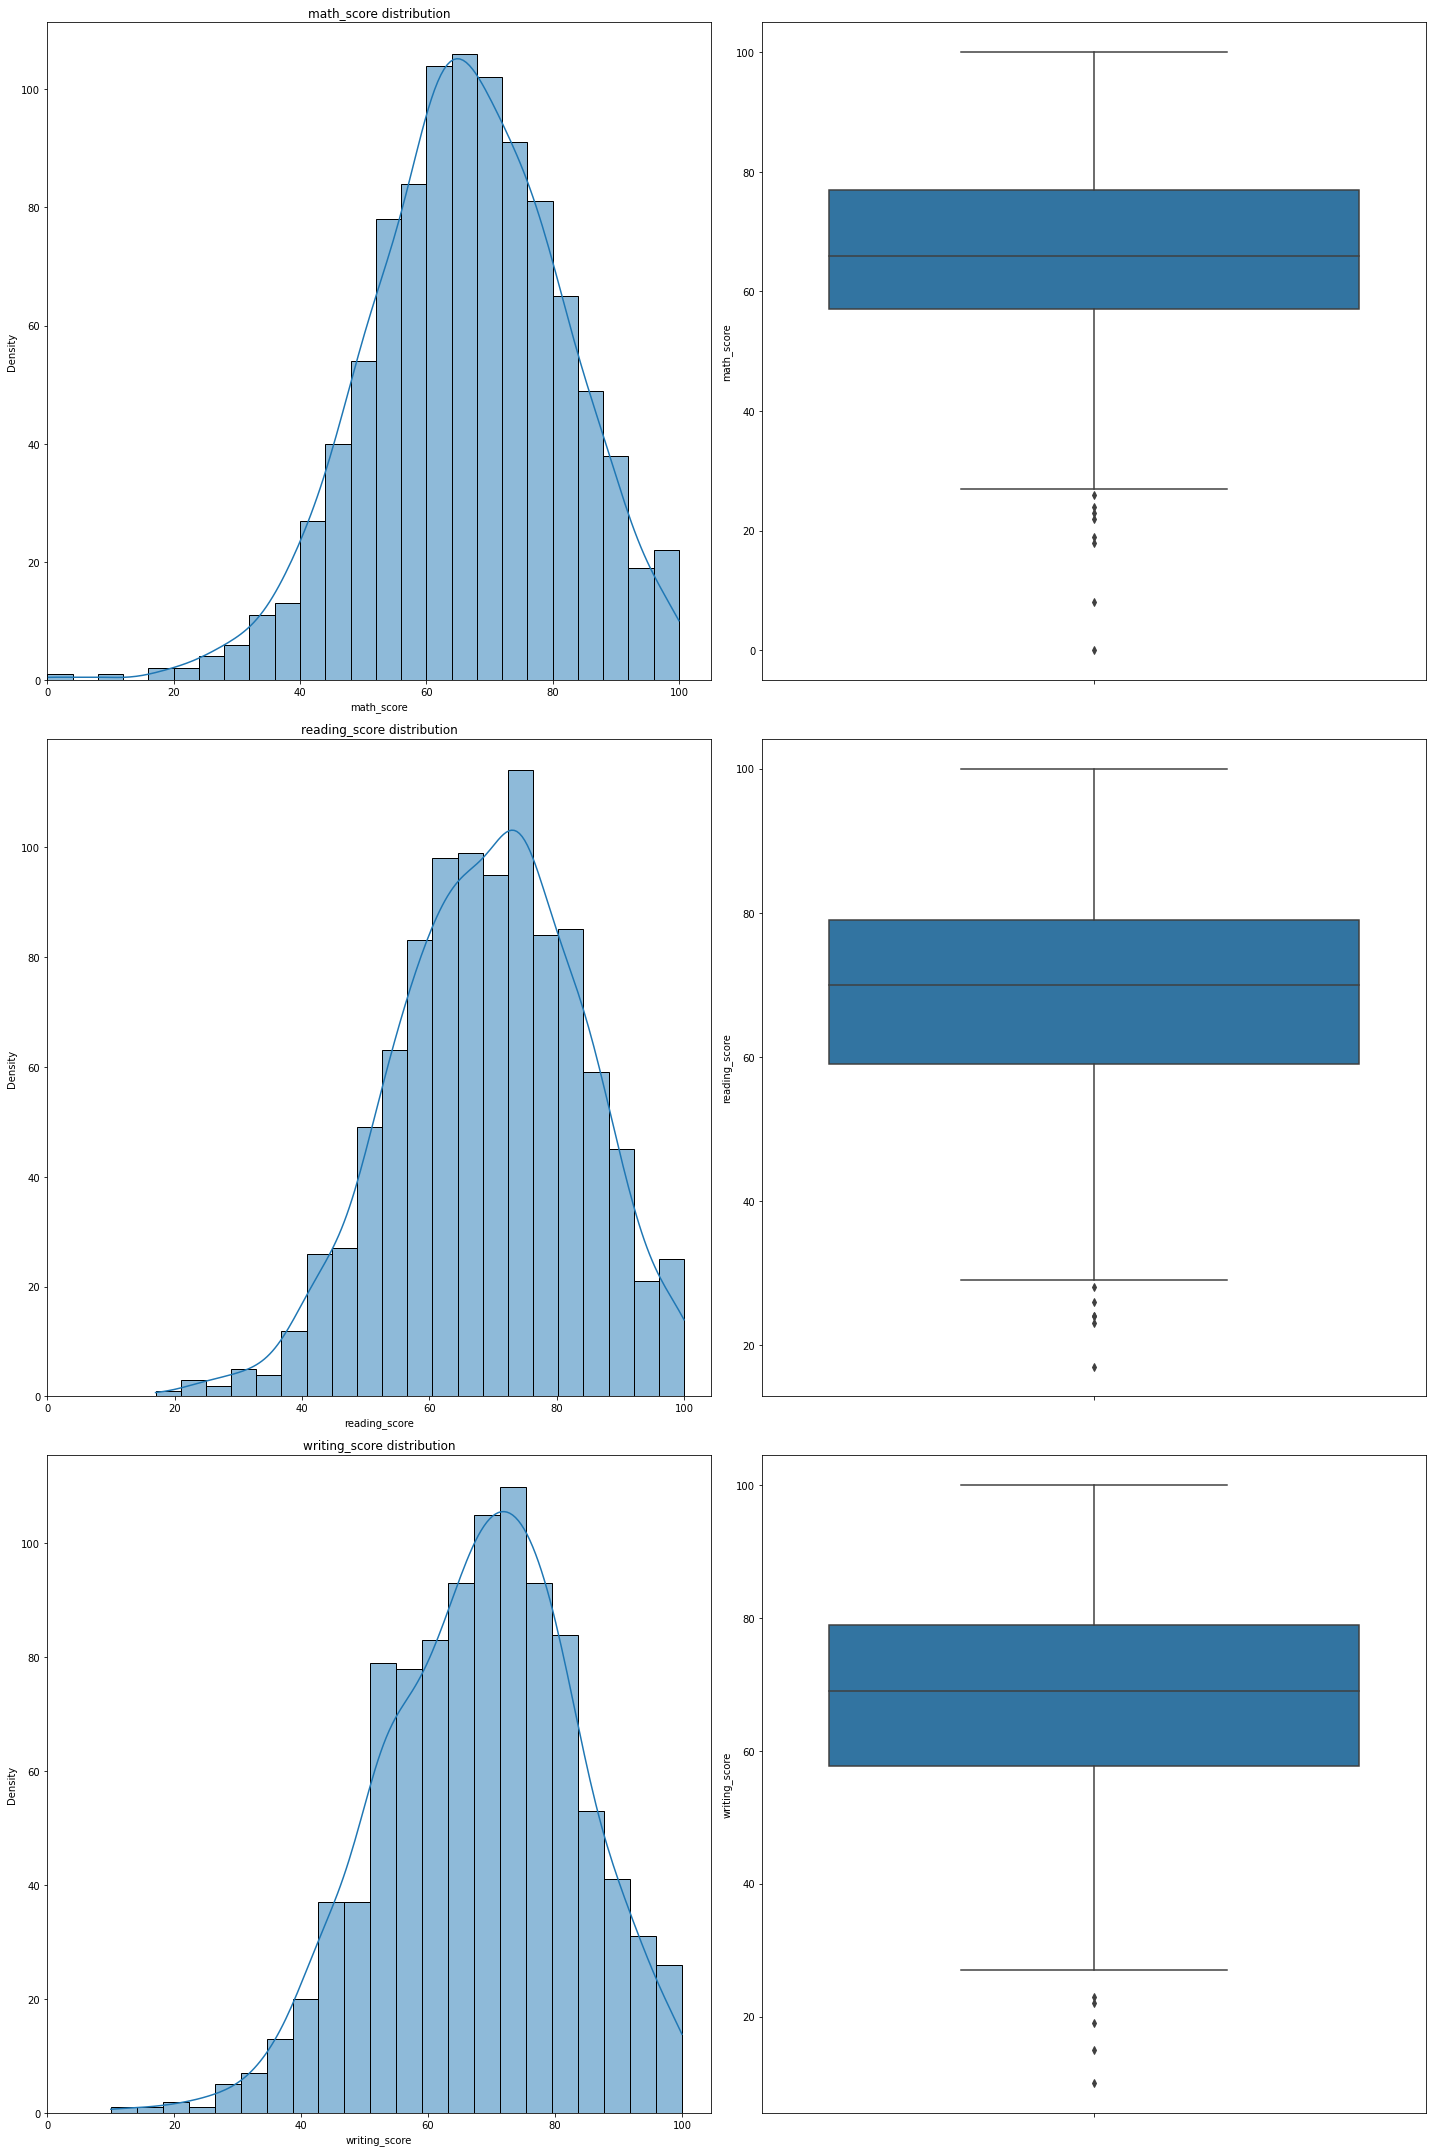

In [11]:
# Visualizing Math, Reading and Writing scores, respectively

col_num = list(df.select_dtypes("int64").columns)

fig, axs = plt.subplots(nrows=len(col_num), ncols=2, figsize=(20,30))

for i, num in enumerate(col_num):
    sns.histplot(data=df, x=num, palette="Blues_r", kde=True, ax=axs[i, 0])
    sns.boxplot(data=df, y=num, ax=axs[i, 1])
    axs[i, 0].set_ylabel("Density")
    axs[i, 0].set_title(f"{num} distribution")
    axs[i, 0].set_xlim(left=0)

plt.tight_layout()
plt.show()

### Overview

* **Gender**: As we see, our sample contains slightly more females than males (36 more).


* **Race/ethnicity**: C > D > B > E > A.


  Group C, that represents 'White - Any other White background', contains many more values than the other groups. Group A (White - British) and E (Mixed - White and Black African), are the minors.


* **Parental level of education**: some college > associate's degree > high school > some high school > bachelor's degree > master's degree.
  
  
  Very few parents have a 'master's degree' or even a 'bachelor's degree', while most parents have 'some college' or 'associate's degree'. It means that, in our sample, most parents have spent little time in their own formal education.


* **Lunch**: More than half of students receive a standard lunch, but concerns that nearly 400 students receive a reduced lunch or none at all.


* **Test preparation course**: More than 60% of students do not attend a preparatory course.


* **Math score**: Most scores are concentrated between 50 and 80, with an average of 66.


* **Reading score**: Most scores are concentrated between 50 and 80, with an average of 69.


* **Writing score**: Most scores are concentrated between 50 and 80, with an average of 68.

## Multivariate analysis

Which variables may be related to the scores?

### Test preparation course & Scores

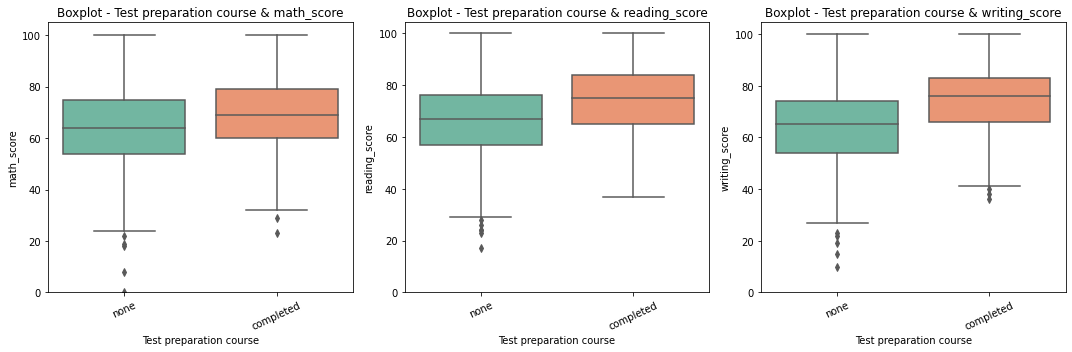

In [12]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

for i, sub in enumerate(col_num):
    sns.boxplot(x="test_preparation_course", y=sub, data=df, palette="Set2", ax=axs[i])
    axs[i].set_ylabel(f"{sub}")
    axs[i].set_xlabel("Test preparation course")
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=25)
    axs[i].set_title(f"Boxplot - Test preparation course & {sub}")
    axs[i].set_ylim(bottom=0)

plt.tight_layout()
plt.show()

In all exams, the median score is higher when students have completed the preparation course. 


It isn't a big difference, but taking the preparation course seems to be useful if you want to improve your score, especially in Reading and Writing.

### Parental level of education & Scores

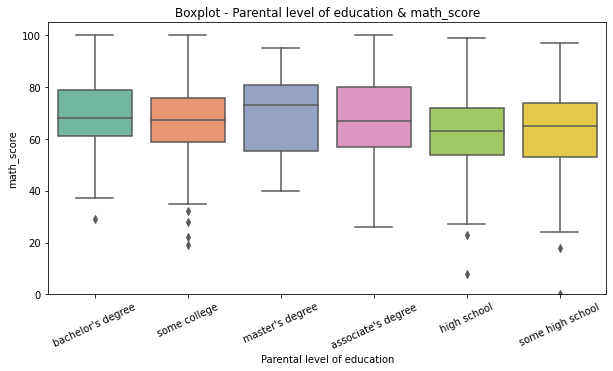

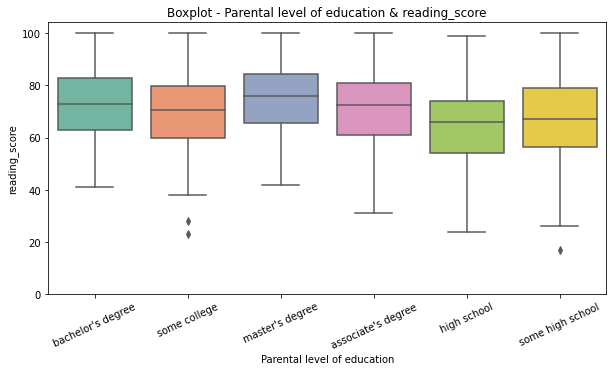

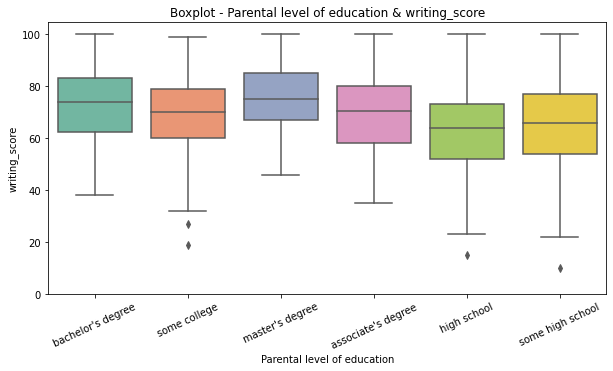

In [13]:
for sub in col_num:
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(x="parental_level_of_education", y=sub, data=df, palette="Set2")
    ax.set_ylabel(f"{sub}")
    ax.set_xlabel("Parental level of education")
    plt.xticks(rotation=25)
    ax.set_title(f"Boxplot - Parental level of education & {sub}")
    ax.set_ylim(bottom=0)
    plt.show()

Highest median scores for all exams are when the parents have a master's degree, lowest when a high school.


It seems that the higher the level of education of the parents, the higher the score of the students.

### Lunch & Scores

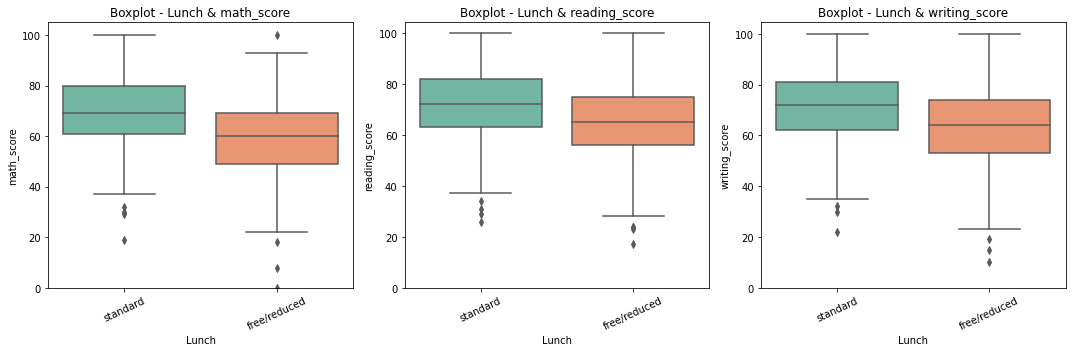

In [14]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

for i, sub in enumerate(col_num):
    sns.boxplot(x="lunch", y=sub, data=df, palette="Set2", ax=axs[i])
    axs[i].set_ylabel(f"{sub}")
    axs[i].set_xlabel("Lunch")
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=25)
    axs[i].set_title(f"Boxplot - Lunch & {sub}")
    axs[i].set_ylim(bottom=0)

plt.tight_layout()
plt.show()

Students scored higher on all exams when they received standard lunches in comparison to when they received a reduced lunch or none at all. It is an impressive difference.

### Race/Ethnicity & Scores

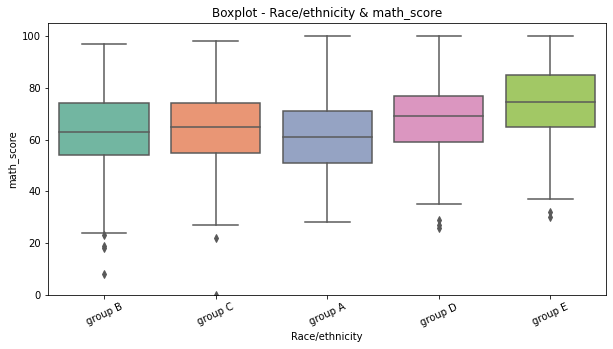

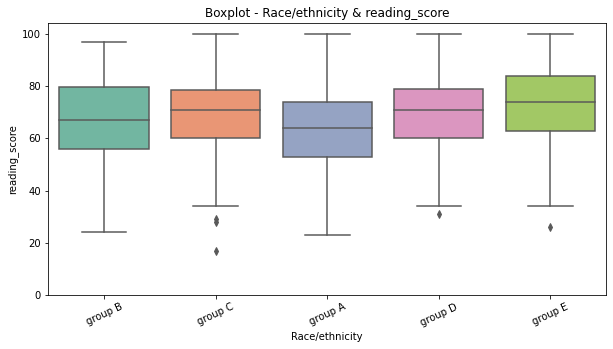

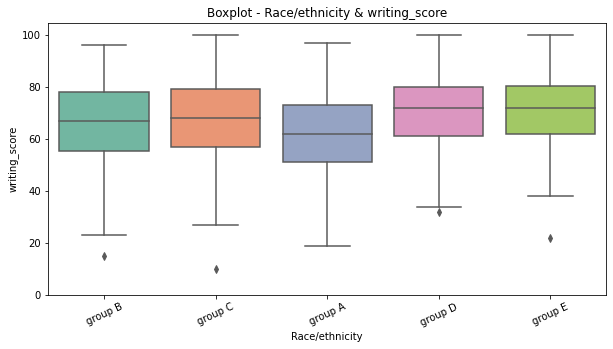

In [15]:
for sub in col_num:
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(x="race/ethnicity", y=sub, data=df, palette="Set2")
    ax.set_ylabel(f"{sub}")
    ax.set_xlabel("Race/ethnicity")
    plt.xticks(rotation=25)
    ax.set_title(f"Boxplot - Race/ethnicity & {sub}")
    ax.set_ylim(bottom=0)
    plt.show()

Group E (Mixed - White and Black African) had the best median scores for all exams, an expressive difference, especially in Math, while Group A (White - British) had the lowest.


It is important to say that group A (total: 89) has the smallest number of students in our sample, group E (total: 140), in turn, is the second smallest.

### Gender & Scores

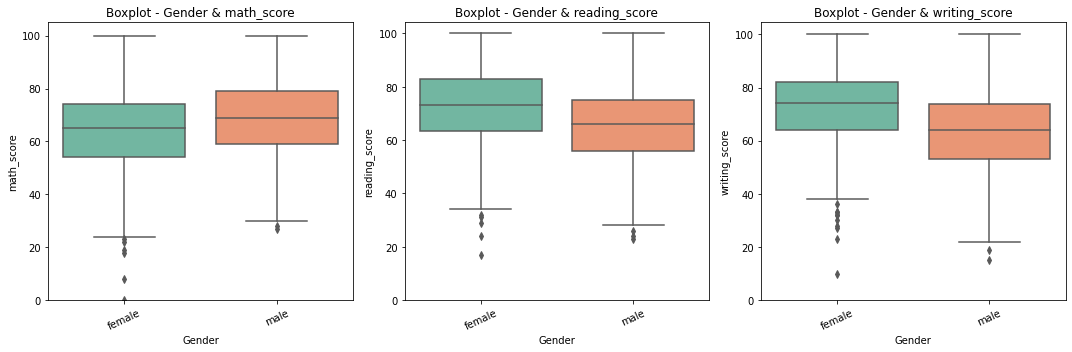

In [16]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

for i, sub in enumerate(col_num):
    sns.boxplot(x="gender", y=sub, data=df, palette="Set2", ax=axs[i])
    axs[i].set_ylabel(f"{sub}")
    axs[i].set_xlabel("Gender")
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=25)
    axs[i].set_title(f"Boxplot - Gender & {sub}")
    axs[i].set_ylim(bottom=0)

plt.tight_layout()
plt.show()

While male students had the best median scores in Math, female students had the best median scores in Reading and Writing. An expressive difference for Writing.

### Correlation between scores

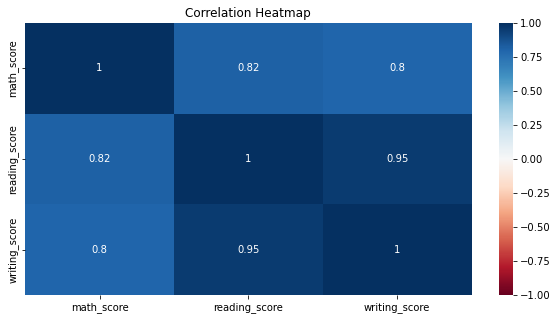

In [17]:
# Plotting the heatmap
plt.figure(figsize = (10, 5))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'RdBu')
plt.show()

Reading and Writing scores have a very strong positive correlation (0.95), and Math also has a strong positive correlation with Reading (0.82) and Writing (0.8).

### Relation between scores and gender

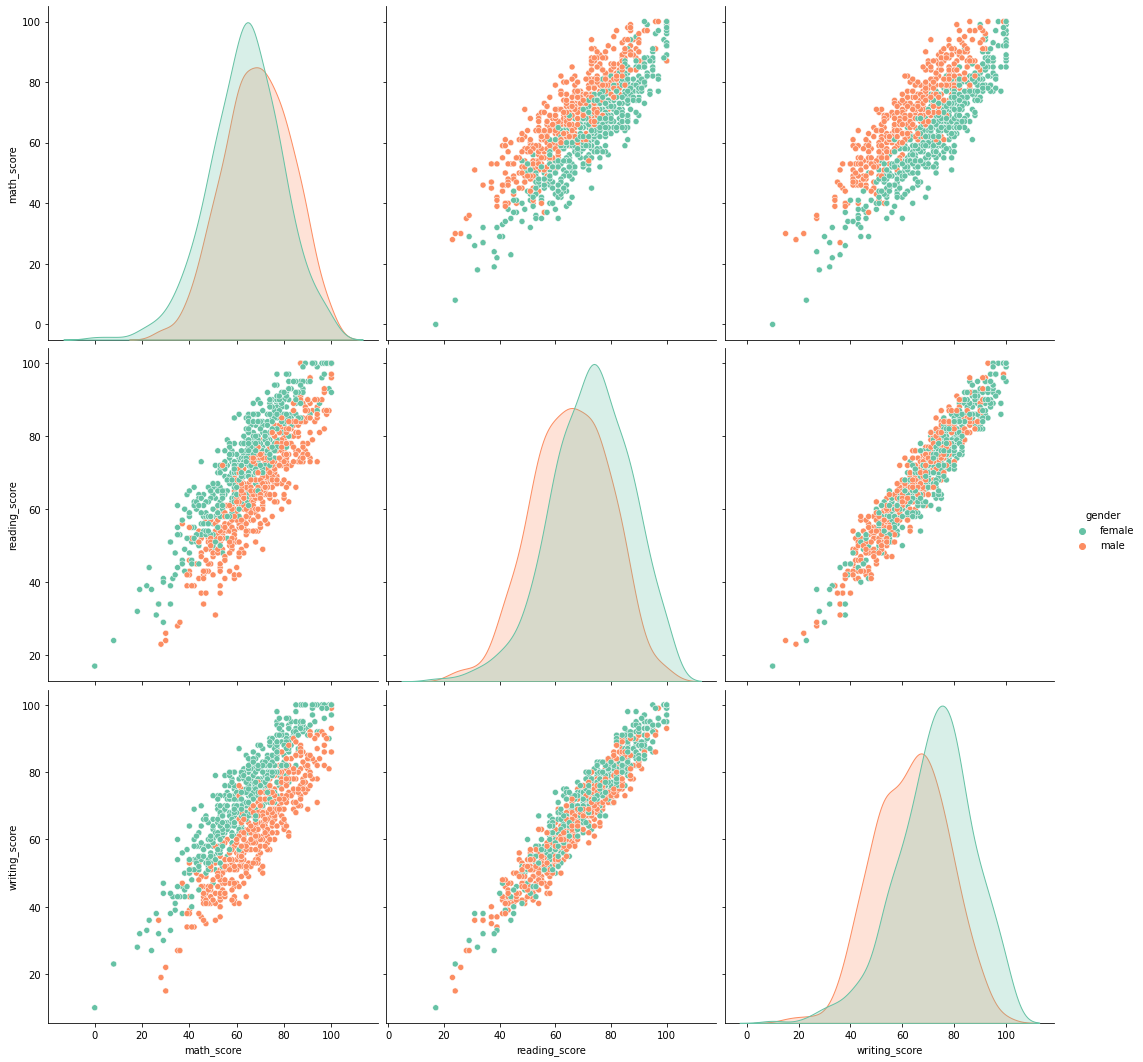

In [18]:
sns.pairplot(df[["math_score", "reading_score", "writing_score", "gender"]], hue="gender", palette="Set2", height=5);

As we already said, female students got better grades, in general.


And, as the heatmap above showed us, the scores of the different subjects increase linearly with each other.

# Passing grades

Brazilian schools, in general, adopt an average of 5 for approval in the subjects. So let's adopt this system here too.

In [19]:
# Let's add columns for approval in the 3 subjects

def verify_math(math_score):
    if math_score >= 50:
        return 1
    else:
        return 0

df['math_approved'] = df['math_score'].apply(verify_math)

def verify_reading(reading_score):
    if reading_score >= 50:
        return 1
    else:
        return 0

df['reading_approved'] = df['reading_score'].apply(verify_reading)

def verify_writing(writing_score):
    if writing_score >= 50:
        return 1
    else:
        return 0

df['writing_approved'] = df['writing_score'].apply(verify_writing)

df.head(10)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,math_approved,reading_approved,writing_approved
0,female,group B,bachelor's degree,standard,none,72,72,74,1,1,1
1,female,group C,some college,standard,completed,69,90,88,1,1,1
2,female,group B,master's degree,standard,none,90,95,93,1,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1,0
4,male,group C,some college,standard,none,76,78,75,1,1,1
5,female,group B,associate's degree,standard,none,71,83,78,1,1,1
6,female,group B,some college,standard,completed,88,95,92,1,1,1
7,male,group B,some college,free/reduced,none,40,43,39,0,0,0
8,male,group D,high school,free/reduced,completed,64,64,67,1,1,1
9,female,group B,high school,free/reduced,none,38,60,50,0,1,1


## Math

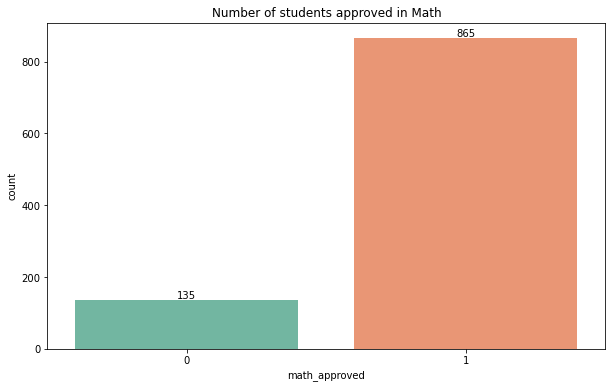

In [28]:
# Number of students approveds in Math
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='math_approved', palette="Set2")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
_ = plt.title("Number of students approved in Math")

Nice information! More than 85% of the students passed in Math.

### Math pass by gender

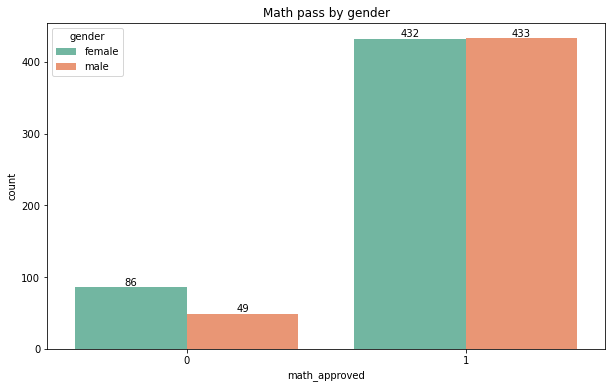

In [29]:
# Math pass by gender
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='math_approved', palette="Set2", hue='gender')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
_ = plt.title("Math pass by gender")

In [35]:
#Percentage by race
pd.crosstab(index=df['gender'], columns=df['math_approved'], normalize='index')

math_approved,0,1
gender,,
female,0.166023,0.833977
male,0.101660,0.898340


Interesting, the percentage of male students that passed in Math is bigger than of female students.

### Math pass by race

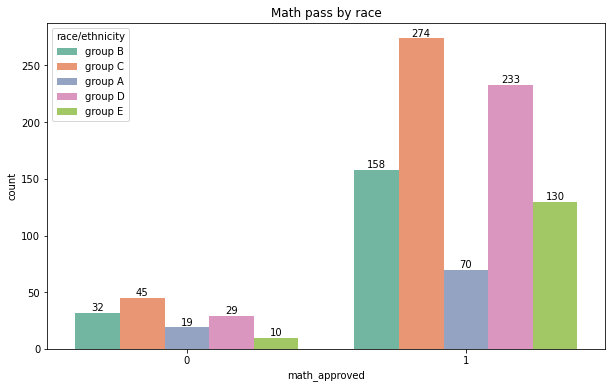

In [31]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='math_approved', palette="Set2", hue='race/ethnicity')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
_ = plt.title("Math pass by race")

In [34]:
#Percentage by race
pd.crosstab(index=df['race/ethnicity'], columns=df['math_approved'], normalize='index')

math_approved,0,1
race/ethnicity,,
group A,0.213483,0.786517
group B,0.168421,0.831579
group C,0.141066,0.858934
group D,0.110687,0.889313
group E,0.071429,0.928571


Now we can observe that <b> Group E </b> (Mixed - White and Black African) has the highest percentage of passed students in Math, while <b> Group A </b> (White - British) has the highest percentage of failed students in Math.

### Math pass by parental level of education

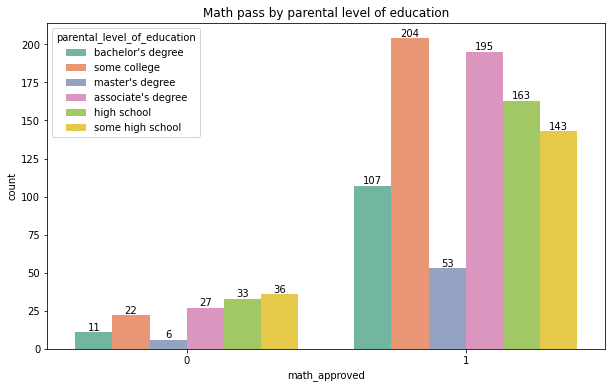

In [36]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='math_approved', palette="Set2", hue='parental_level_of_education')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
_ = plt.title("Math pass by parental level of education")

This chart is not helping much, let's check the percentage with a crosstab.

In [38]:
pd.crosstab(index=df['parental_level_of_education'], columns=df['math_approved'], normalize='index')

math_approved,0,1
parental_level_of_education,,
associate's degree,0.121622,0.878378
bachelor's degree,0.093220,0.906780
high school,0.168367,0.831633
master's degree,0.101695,0.898305
some college,0.097345,0.902655
some high school,0.201117,0.798883


Interesting how some high school and high school have the highest percentage of failed students in Math.

### Math pass by lunch

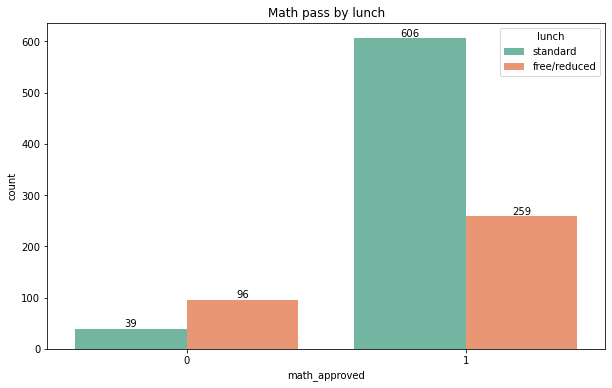

In [39]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='math_approved', palette="Set2", hue='lunch')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
_ = plt.title("Math pass by lunch")

In [40]:
pd.crosstab(index=df['lunch'], columns=df['math_approved'], normalize='index')

math_approved,0,1
lunch,,
free/reduced,0.270423,0.729577
standard,0.060465,0.939535


<b> That's a huge difference!! </b> Having a standard lunch seems to improve the students' performance in Math.

### Math pass by test preparation course

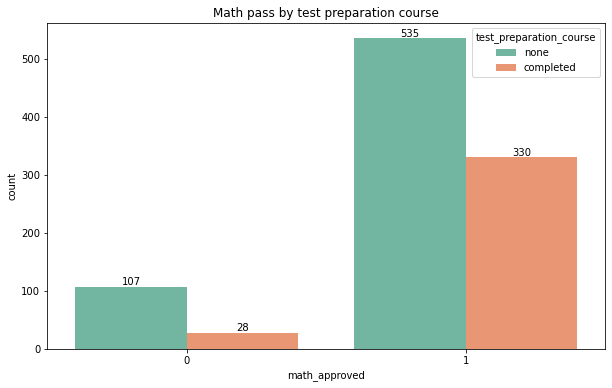

In [41]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='math_approved', palette="Set2", hue='test_preparation_course')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
_ = plt.title("Math pass by test preparation course")

In [43]:
pd.crosstab(index=df['test_preparation_course'], columns=df['math_approved'], normalize='index')

math_approved,0,1
test_preparation_course,,
completed,0.078212,0.921788
none,0.166667,0.833333


Also a big difference. Taking the preparation course seems to improve the students' performance in Math.

In [48]:
# Define the list of columns for which you want to calculate percentages
columns_to_check = ['lunch', 'test_preparation_course']

# Calculate the percentage of each subgroup for each column using a loop
for column in columns_to_check:
    percentage = pd.crosstab(index=df['math_approved'], columns=df[column], normalize='index') * 100
    print(f"Percentage based on '{column}' column:")
    print(percentage)
    print()

Percentage based on 'lunch' column:
lunch          free/reduced   standard
math_approved                         
0                 71.111111  28.888889
1                 29.942197  70.057803

Percentage based on 'test_preparation_course' column:
test_preparation_course  completed       none
math_approved                                
0                        20.740741  79.259259
1                        38.150289  61.849711

